In [3]:
import pmdarima as pm
from pmdarima.arima import ADFTest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math as math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from numpy import log

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

C:\Users\I514609\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
# reading the data
df = pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
data = df.sort_index(ascending=True, axis=0)

data.head()

C:\Users\I514609\AppData\Local\Temp\ipykernel_25056\1668925969.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('./data/Stock_Price_BRL 2016-2021.csv',header=0, index_col=0, parse_dates=True, squeeze=True)


,Close_Stock(EUR),Close_EUR,Close_Stock(BRL)
Date,,,
2016-01-04,70.580002,4.2891,302.724687
2016-01-05,71.430000,4.3710,312.220530
2016-01-06,72.050003,4.3301,311.983718
2016-01-07,71.339996,4.3322,309.059131
2016-01-08,71.050003,4.4145,313.650238


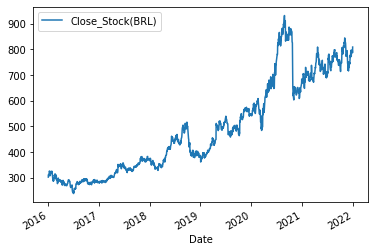

In [5]:
df['Close_Stock(BRL)'].plot()
plt.legend()
plt.show()

In [10]:
result = adfuller(df['Close_Stock(BRL)'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(result)

ADF Statistic: -0.658932
p-value: 0.857102
(-0.6589318342337721, 0.8571023440624206, 6, 1512, {'1%': -3.43468229933681, '5%': -2.8634534376843637, '10%': -2.5677886890239634}, 11323.628962158542)


In [11]:
result = adfuller(df['Close_Stock(BRL)'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.416222
p-value: 0.000000


In [12]:
result = adfuller(df['Close_Stock(BRL)'].diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.302201
p-value: 0.000000


In [15]:
df['Close_Stock'] = df['Close_Stock(BRL)']
df.head()

,Close_Stock(EUR),Close_EUR,Close_Stock(BRL),Close_Stock
Date,,,,
2016-01-04,70.580002,4.2891,302.724687,302.724687
2016-01-05,71.430000,4.3710,312.220530,312.220530
2016-01-06,72.050003,4.3301,311.983718,311.983718
2016-01-07,71.339996,4.3322,309.059131,309.059131
2016-01-08,71.050003,4.4145,313.650238,313.650238


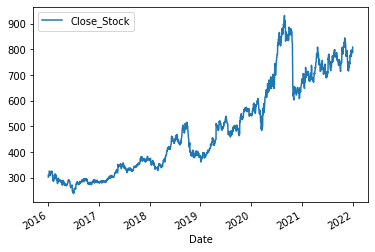

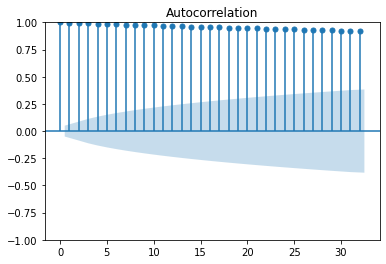

In [24]:
df.Close_Stock.plot()
plt.legend()
plt.show()

plot_acf(df.Close_Stock)
plt.show()

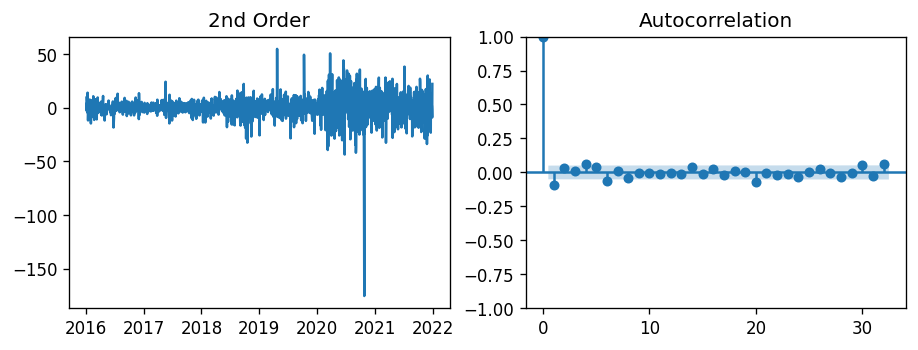

In [27]:
# d parameter = 1
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title('1nd Order')
ax1.plot(df['Close_Stock(BRL)'].diff())

ax2 = f.add_subplot(122)
plot_acf(df['Close_Stock(BRL)'].diff().dropna(), ax=ax2)
plt.show()

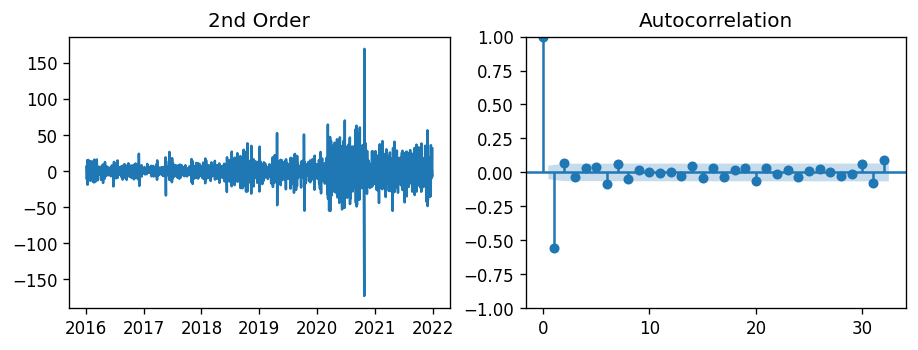

In [28]:
# d parameter = 2
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
f = plt.figure()
ax1= f.add_subplot(121)
ax1.set_title('2nd Order')
ax1.plot(df['Close_Stock(BRL)'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df['Close_Stock(BRL)'].diff().diff().dropna(), ax=ax2)
plt.show()

C:\Users\I514609\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


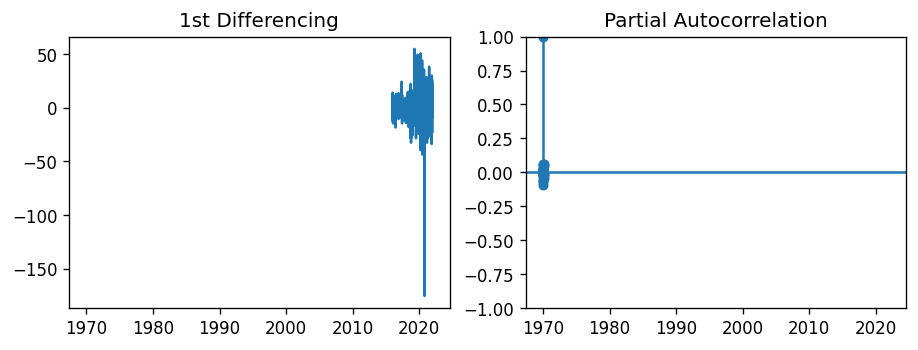

In [169]:
# p parameter = 1
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Close_Stock(BRL)'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['Close_Stock(BRL)'].diff().dropna(), ax=axes[1])

plt.show()

C:\Users\I514609\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


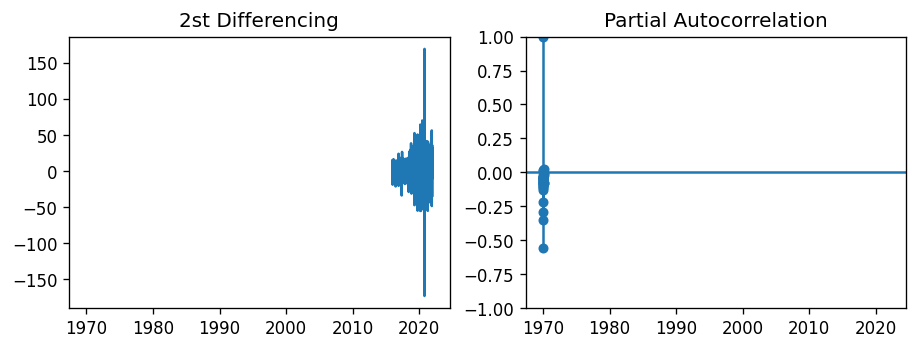

In [29]:
# p parameter = 1
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df['Close_Stock(BRL)'].diff().diff()); axes[0].set_title('2st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df['Close_Stock(BRL)'].diff().diff().dropna(), ax=axes[1])

plt.show()

In [181]:
model = ARIMA(df['Close_Stock(BRL)'], order=(1,1,0), trend='n')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Close_Stock(BRL)   No. Observations:                 1519
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5746.909
Date:                Mon, 07 Feb 2022   AIC                          11497.818
Time:                        23:13:03   BIC                          11508.468
Sample:                             0   HQIC                         11501.783
                               - 1519                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0922      0.018     -5.158      0.000      -0.127      -0.057
sigma2       113.7428      0.812    140.137      0.000     112.152     115.334
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\I514609\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\I514609\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\I514609\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no 

In [119]:
train = data[:760]
valid = data[759:]

In [183]:
training = train['Close_Stock(BRL)']
validation = valid['Close_Stock(BRL)']

model = pm.auto_arima(training, start_p=0, start_q=0,max_p=10, max_d=10, max_q=10, m=20,start_P=0, seasonal=True,d=0, D=1, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
model.fit(training)

forecast = model.predict(n_periods=760)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

print(forecast.head())


Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  760
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2448.264
Date:                            Mon, 07 Feb 2022   AIC                           4904.528
Time:                                    18:24:39   BIC                           4922.992
Sample:                                         0   HQIC                          4911.644
                                            - 760                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1047      0.031     -3.330      0.001      -0.166      -0.043
ar.S.L12      -0.6748      0.030    -22.659      0.000      -0.733      -0.616
ar.S.L24      -0.3327      0.028    -11.975      0.000      -0.387      -0.278
sigma2        40.7927      1.380     29.554      0.000      38.087      43.498
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               302.63
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               2.49   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
df_final = pd.DataFrame(data[759:])
df_forecast = pd.DataFrame(forecast)

print(df_final.head())
print(df_forecast.head())

            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)
Date                                                     
2018-12-28         86.930000     4.4230        384.491390
2019-01-02         87.010002     4.4472        386.950881
2019-01-03         84.309998     4.2853        361.293634
2019-01-04         86.440002     4.2756        369.582873
2019-01-07         86.620003     4.2300        366.402613
            Prediction
Date                  
2018-12-28  386.176453
2019-01-02  393.109288
2019-01-03  392.487240
2019-01-04  397.677930
2019-01-07  386.883694


In [128]:
df_result = df_final.join(df_forecast)
print(df_result)

            Close_Stock(EUR)  Close_EUR  Close_Stock(BRL)  Prediction
Date                                                                 
2018-12-28         86.930000     4.4230        384.491390  386.176453
2019-01-02         87.010002     4.4472        386.950881  393.109288
2019-01-03         84.309998     4.2853        361.293634  392.487240
2019-01-04         86.440002     4.2756        369.582873  397.677930
2019-01-07         86.620003     4.2300        366.402613  386.883694
...                      ...        ...               ...         ...
2021-12-23        123.519997     6.4351        794.863533  241.016449
2021-12-27        124.139999     6.4198        796.953966  242.876507
2021-12-28        124.879997     6.3693        795.398165  249.167216
2021-12-29        123.559998     6.3644        786.385251  249.913684
2021-12-30        124.900002     6.4745        808.665063  253.387291

[760 rows x 4 columns]


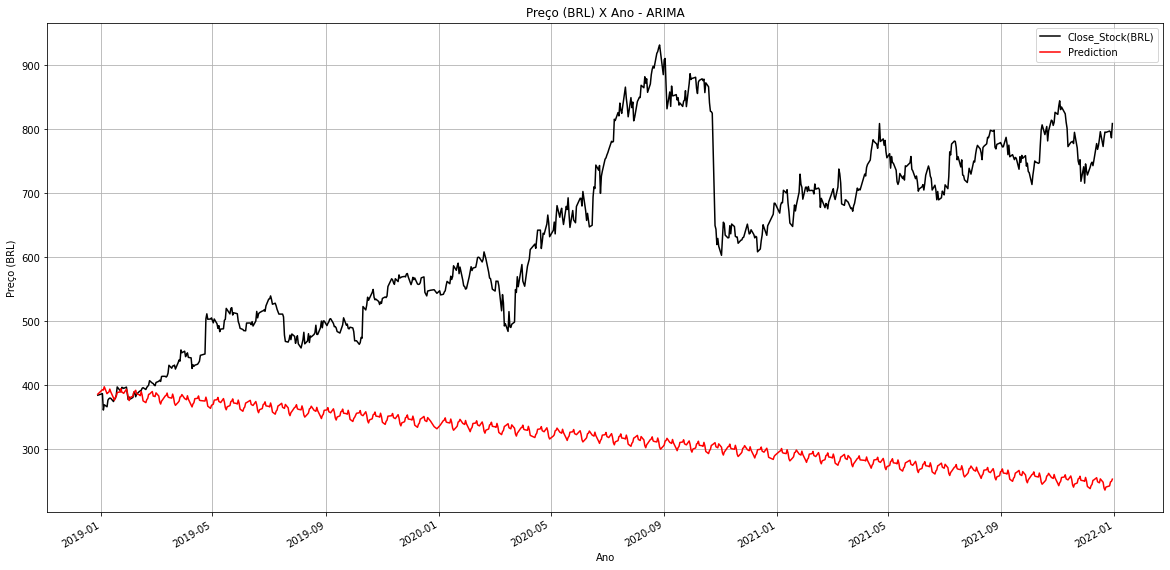

In [129]:
plt.figure(figsize = (20,10))
df_result["Close_Stock(BRL)"][:760].plot(color = 'k', label= 'Close_Stock(BRL)')
df_result['Prediction'].plot(color = 'r', label= 'Prediction') 

plt.ylabel('Preço (BRL)')
plt.xlabel('Ano')
plt.title('Preço (BRL) X Ano - ARIMA')
plt.legend()
plt.grid()
plt.show()

In [137]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [136]:
mse = mean_squared_error(df_result['Close_Stock(BRL)'], df_result['Prediction'])
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(df_result['Close_Stock(BRL)'], df_result['Prediction'])
r2 = r2_score(df_result['Close_Stock(BRL)'], df_result['Prediction'])


print(mse)
print(rmse)
print(mape)
print(r2)

134441.75038862563
366.6629929357824
46.289770609671734
-5.853930933205693
